<a href="https://colab.research.google.com/github/Sasi-2002-max/prodigytasks/blob/main/Prodigy_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

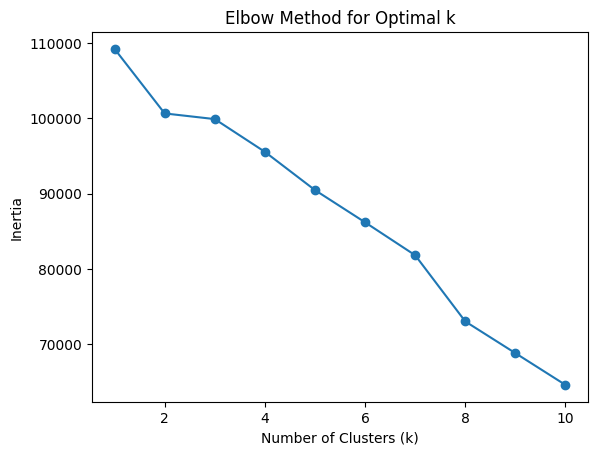

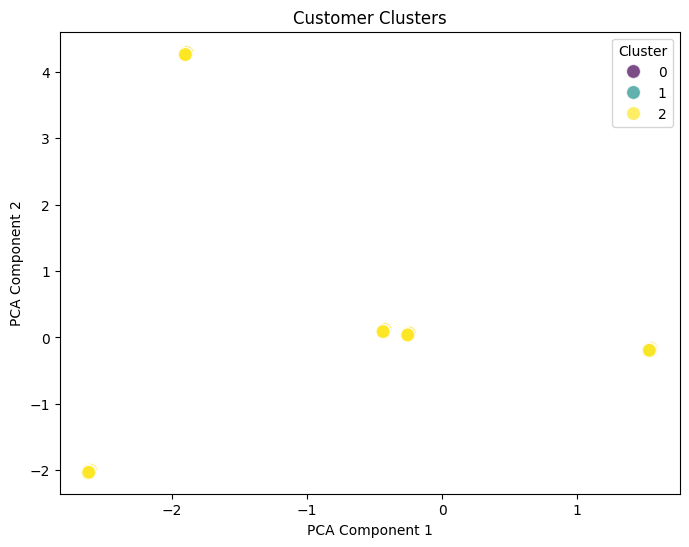

               Age  Purchase Amount (USD)
Cluster                                  
0        44.847222              62.625000
1        41.994083              61.136095
2        44.134932              59.584890
               Age  Purchase Amount (USD)
Cluster                                  
0        44.847222              62.625000
1        41.994083              61.136095
2        44.134932              59.584890


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/shopping_trends.csv')

# Select features for clustering
X = data[['Item Purchased', 'Gender', 'Category']]
X = pd.get_dummies(X, columns=['Item Purchased', 'Gender', 'Category'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with k=3 (or the optimal k from the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze clusters

cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',  # Example: Calculate average age for each cluster
    'Purchase Amount (USD)': 'mean',  # Example: Calculate average purchase amount
    # Add other relevant numerical columns here
})
print(cluster_summary)
print(cluster_summary)
